In [ ]:
# Libraries
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE


# SBERT Model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Read the JSON file
df = pd.read_json('sample2_data.json')
cols = df.columns.to_list()
print(cols)

movie_plot_data = df[['Title', 'Plot']]
movie_plot_data

['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'totalSeasons']


,Title,Plot
0,#Alive,"Without warning, people in the streets of Seou..."
1,'71,A young British soldier is accidentally abando...
2,'83,March 1983 Indian cricket team gets selected f...
3,10 Cloverfield Lane,"After getting in a car accident, Michelle awak..."
4,10 Things I Hate About You,"Adapted from William Shakespeare's play ""The T..."
...,...,...
4917,"tick, tick... BOOM!","The film follows Jon (Andrew Garfield), a youn..."
4918,xXx,"Xander ""XXX"" Cage is a thrill seeker who until..."
4919,xXx: Return of Xander Cage,Extreme athlete turned government operative Xa...
4920,xXx: State of the Union,Agent Augustus Gibbons has selected an impriso...


In [41]:
plots = movie_plot_data["Plot"]

# Encode the plots
# embeddings_pre = model.encode(plots)
# embeddings = normalize(embeddings_pre, norm='l2')
# for plot, embedp, embedn in zip(plots[0:5], embeddings_pre[0:5], embeddings[0:5]):
#     print(f"Plot: {plot}")
#     print(f"Embedding: {embedp[:5]}...")  # Print first 5 dimensions of the embedding
#     print(f"Embedding: {embedn[:5]}...")  # Print first 5 dimensions of the embedding
#     print(f"Embedding Length: {len(embedn)}")
#     print("-" * 50)

embeddings = model.encode(plots)
# for plot, embed in zip(plots[0:5], embeddings[0:5]):
#     print(f"Plot: {plot}")
#     print(f"Embedding: {embed[:5]}...")  # Print first 5 dimensions of the embedding
#     print(f"Embedding Length: {len(embed)}")
#     print("-" * 50)


Plot: Without warning, people in the streets of Seoul become extremely violent, cannibalistic, attacking passersby, behaving like zombies. A young man alone in his parents' 4th floor apartment becomes spectator to all this. There're no groceries left in the apartment. He foolishly opens the door and a neighbor forces himself in. He's infected but is finally forced out. TV informs him that the virus is spreading nationwide. As the days pass, the phone and internet stop working, then the water's gone. When all hope is gone, he sees a cute girl in the apartment across from his.
Embedding: [0.02372057 0.03117971 0.02160433 0.01004707 0.10821403]...
Embedding Length: 384
--------------------------------------------------
Plot: A young British soldier is accidentally abandoned by his unit following a terrifying riot on the streets of Belfast in 1971. Unable to tell friend from foe, the raw recruit must survive the night alone and find his way to safety through a disorienting, alien and deadl

{np.int64(0), np.int64(1), np.int64(-1)}
Noise: 1760


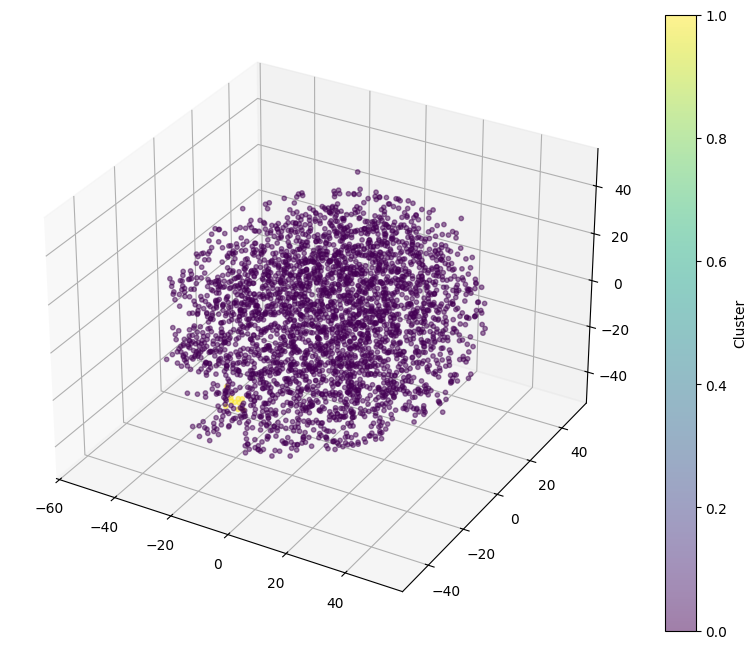

In [45]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.55, min_samples=5, metric='cosine')
clusters = hdbscan.fit_predict(embeddings)
print(set(clusters))

noise = np.where(clusters == -1)[0]  # Outliers
print(f"Noise: {len(noise)}")
embeddings_no_noise = np.delete(embeddings, noise, axis=0)

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_no_noise)
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings_no_noise)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=clusters[clusters!=-1], cmap='viridis', marker='o', s=10, alpha=0.5)
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

In [44]:
cluster_4_inds = np.where(clusters == 1)[0]
movie_plot_data.iloc[cluster_4_inds]

# 
# cluster_noise_inds = np.where(clusters == -1)[0]
# movie_plot_data.iloc[cluster_noise_inds].tail(10)

,Title,Plot
1254,Fanboys,Star Wars fanatics take a cross-country trip t...
2084,Land of Bad,A Delta Force team fights for survival as an A...
3325,Star Wars: Episode III - Revenge of the Sith,Nearly three years have passed since the begin...
3326,Star Wars: Episode IV - A New Hope,"The Imperial Forces, under orders from cruel D..."
3327,Star Wars: Episode IX - The Rise of Skywalker,While the First Order continues to ravage the ...
3328,Star Wars: Episode V - The Empire Strikes Back,"Luke Skywalker, Han Solo, Princess Leia and Ch..."
3329,Star Wars: Episode VI - Return of the Jedi,Luke Skywalker battles Jabba the Hutt and Dart...
3330,Star Wars: Episode VII - The Force Awakens,30 years after the defeat of Darth Vader and t...
3331,Star Wars: Episode VIII - The Last Jedi,Jedi Master-in-hiding Luke Skywalker unwilling...
3332,Star Wars: The Clone Wars,Chronicling the events that took place between...
